In [17]:
import numpy as np

import matplotlib.pyplot as plt
from polplot import pp

In [16]:
def q2kp(q):
    kp_lim = np.mean([7/3,8/3])
    qlim = np.mean([0.96*kp_lim-0.3,2.04*kp_lim-2.7])

    kp1 = (q+0.3)/0.96
    kp2 = (q+2.7)/2.04
    kp = np.where(q<qlim,kp1,kp2)
    return kp

In [23]:
def kp2al(kp):
    c0 = 18
    c1 =-12.3
    c2 = 27.2
    c3 =-2
    return c0 + c1*kp + c2*kp**2 + c3*kp**3

In [25]:
q = np.arange(7)
kp = q2kp(q)
al = kp2al(kp)
print(q,kp,al)

[0 1 2 3 4 5 6] [0.3125     1.35416667 2.39583333 2.79411765 3.28431373 3.7745098
 4.26470588] [ 16.75146484  46.25576895 117.15547237 152.35741909 200.14771091
 251.53955869 305.11947893]


In [12]:
Q1 = np.r_[.96*kp[:8]-0.3 , 2.04*kp[8:]-2.7]
Q2 = 2*kp - 0.35
Q3 = 1.33*kp + np.exp (kp - 8) 

[-0.3   0.02  0.34  0.66  0.98  1.3   1.62  1.94  2.26  3.42  4.1   4.78
  5.46  6.14  6.82  7.5   8.18  8.86  9.54 10.22 10.9  11.58 12.26 12.94
 13.62 14.3  14.98 15.66]


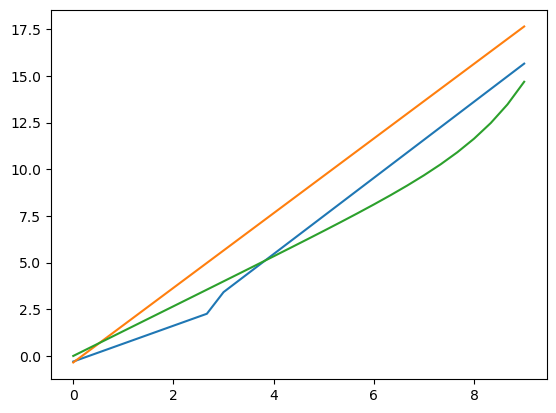

In [13]:
fig,ax = plt.subplots()
ax.plot(kp,Q1)
ax.plot(kp,Q2)
ax.plot(kp,Q3)
print(Q1)



In [21]:
q = np.arange(7)
print((q+0.3)/0.96)
print((q+2.7)/2.04)

[0.3125     1.35416667 2.39583333 3.4375     4.47916667 5.52083333
 6.5625    ]
[1.32352941 1.81372549 2.30392157 2.79411765 3.28431373 3.7745098
 4.26470588]


array([0, 1, 2, 3, 4, 5, 6])

In [19]:
q2kp = np.array([1, 4, 7, 8, 10, 11,13])/3
q2kp

array([0.33333333, 1.33333333, 2.33333333, 2.66666667, 3.33333333,
       3.66666667, 4.33333333])

In [24]:
def oval_starkov1994(mlt,al):
    mlt = np.arange(0,24.1,0.1)

    # Polar boundary
    b00 = np.array([-0.07, -10.06, -4.44, -3.77, -6.61, 6.37, -4.48])
    b10 = np.array([ 24.54, 19.83, 7.47, 7.90, 10.17, -1.10, 10.16])
    b20 = np.array([-12.53, -9.33, -3.01, -4.73, -5.80, 0.34, -5.87])
    b30 = np.array([ 2.15, 1.24, 0.25, 0.91, 1.19, -0.38, 0.98])

    coeffs = b00 + b10*np.log10(al) + b20*np.log10(al)**2 + b30*np.log10(al)**3

    clat_pb = coeffs[0] + coeffs[1]*np.cos(np.deg2rad(15*(mlt+ coeffs[4]))) + coeffs[2]*np.cos(np.deg2rad(15*(2*mlt+coeffs[5]))) + coeffs[3]*np.cos(np.deg2rad(15*(3*mlt+coeffs[6])))

    # Equatorial boundary
    b01 = np.array([ 1.61, -9.59, -12.07, -6.56, -2.22, -23.98, -20.07])
    b11 = np.array([ 23.21, 17.78, 17.49, 11.44, 1.50, 42.79, 36.67,])
    b21 = np.array([-10.97, -7.20, -7.96, -6.73, -0.58, -26.96, -24.20])
    b31 = np.array([ 2.03, 0.96, 1.15, 1.31, 0.08, 5.56, 5.11])

    coeffs = b01 + b11*np.log10(al) + b21*np.log10(al)**2 + b31*np.log10(al)**3

    clat_eb = coeffs[0] + coeffs[1]*np.cos(np.deg2rad(15*(mlt+ coeffs[4]))) + coeffs[2]*np.cos(np.deg2rad(15*(2*mlt+coeffs[5]))) + coeffs[3]*np.cos(np.deg2rad(15*(3*mlt+coeffs[6])))

    return (90-clat_pb,90-clat_eb)

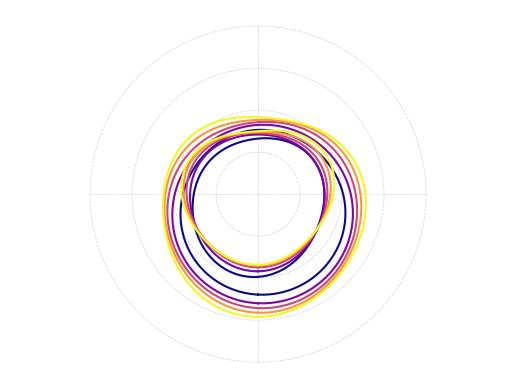

In [37]:
mlt=np.arange(0,24.1,0.1)
als=[50,150,250,350,450]
cmap = plt.cm.get_cmap('plasma',5)

fig,ax = plt.subplots()
pax=pp(ax)
for i in range(5):
    pax.plot(oval_starkov1994(mlt,als[i])[0],mlt,color=cmap(i))
    pax.plot(oval_starkov1994(mlt,als[i])[1],mlt,color=cmap(i))

In [13]:
kp2al(9)

NameError: name 'kp2al' is not defined

In [35]:
cmap = plt.cm.get_cmap('jet',5)
cmap(0)

(0.0, 0.0, 0.5, 1.0)

In [ ]:
def oval_hu2017()